# Instruments and pricing engines

#### Setup

Import the QuantLib module and set up the global evaluation date.

In [1]:
from QuantLib import *

In [2]:
today = Date(7, March, 2014)
Settings.instance().evaluationDate = today

#### The option

Building the option requires the specification of its contract. Market data will be selected and passed later, depending on the calculation methods.

In [3]:
option = EuropeanOption(PlainVanillaPayoff(Option.Call, 100.0),
                       EuropeanExercise(Date(7, June, 2014)))

#### First pricing method: analytic Black-Scholes formula

The different pricing methods are implemented as pricing engines holding the required market data.

Quoted market data. We'll assume flat risk-free rate and volatility.

In [4]:
u = SimpleQuote(100.0)
r = SimpleQuote(0.01)
sigma = SimpleQuote(0.20)

The market data are encapsulated in a process object.

In [5]:
riskFreeCurve = FlatForward(0, TARGET(), QuoteHandle(r), Actual360())
volatility = BlackConstantVol(0, TARGET(), QuoteHandle(sigma), Actual360())

In [6]:
process = BlackScholesProcess(QuoteHandle(u),
                             YieldTermStructureHandle(riskFreeCurve),
                             BlackVolTermStructureHandle(volatility))

Finally the process is used to build the engine.

In [7]:
engine = AnalyticEuropeanEngine(process)

Once the option is given an engine, it can be evaluated.

In [8]:
option.setPricingEngine(engine)

In [9]:
print(option.NPV())

4.155543462156206


In [10]:
print(option.delta())

0.5302223303784392


In [11]:
print(option.gamma())

0.03934493301271913


In [12]:
print(option.vega())

20.109632428723106


#### Market changes

The option is notified when any of the data changes

In [13]:
print(option.NPV())

4.155543462156206


In [14]:
u.setValue(105.0)
print(option.NPV())

7.27556357927846


We can use this to graph the option value depending on the underlying asset value.

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

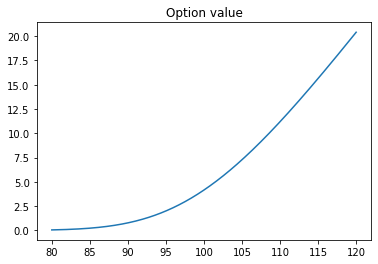

In [16]:
f, ax = plt.subplots()
xs = np.linspace(80.0, 120.0, 400)
ys = []
for x in xs:
    u.setValue(x)
    ys.append(option.NPV())
ax.set_title('Option value')
_ = ax.plot(xs, ys)        

#### Date changes

The value also changes if we advance the evaluation date.

In [17]:
u.setValue(105.0)
print(option.NPV())

7.27556357927846


In [18]:
Settings.instance().evaluationDate = Date(7, April, 2014)

In [19]:
print(option.NPV())

6.560073820974377


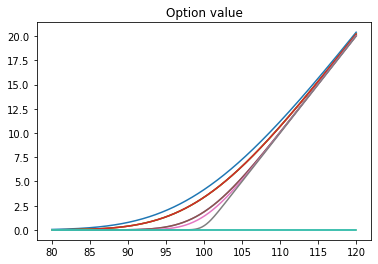

In [41]:
ys = []
for x in xs:
    u.setValue(x)
    ys.append(option.NPV())
ax.plot(xs, ys)
display(f)

In [24]:
Settings.instance().evaluationDate = Date(7, May, 2014)

In [32]:
Settings.instance().evaluationDate = Date(17, May, 2014)

In [34]:
Settings.instance().evaluationDate = Date(27, May, 2014)

In [36]:
Settings.instance().evaluationDate = Date(6, June, 2014)

If we set the evaluation date equals to the maturity date of the option, we can't show the intrinsic payoff because QL interprets the option as having expired. The option value returns 0.

In [40]:
Settings.instance().evaluationDate = Date(7, June, 2014)

In [29]:
print(option.NPV())

0.0


Other market data also affect the value of course.

In [42]:
Settings.instance().evaluationDate = today
u.setValue(105.0)
r.setValue(0.01)
sigma.setValue(0.20)

In [43]:
print(option.NPV())

7.27556357927846


In [44]:
r.setValue(0.03)

In [45]:
print(option.NPV())

7.624029148527754


In [46]:
sigma.setValue(0.25)

In [47]:
print(option.NPV())

8.531296969971573


#### Other pricing methods

In [48]:
Settings.instance().evaluationDate = today
u.setValue(105.0)
r.setValue(0.01)
sigma.setValue(0.20)

In [49]:
print(option.NPV())

7.27556357927846


In [53]:
model = HestonModel(
        HestonProcess(YieldTermStructureHandle(riskFreeCurve),
                     YieldTermStructureHandle(FlatForward(0, TARGET(), 0.0, Actual360())),
                     QuoteHandle(u),
                     0.04, 0.1, 0.01, 0.05, -0.75))

In [54]:
engine = AnalyticHestonEngine(model)
option.setPricingEngine(engine)

In [55]:
print(option.NPV())

7.295356086978629


#### Lazy recalculation

In [56]:
engine = MCEuropeanEngine(process, "PseudoRandom",
                         timeSteps=20,
                         requiredSamples=250000)
option.setPricingEngine(engine)

In [57]:
print(option.NPV())

7.287145997285611


In [58]:
print(option.NPV())

7.287145997285611


In [59]:
u.setValue(104.0)

In [60]:
print(option.NPV())

6.5978003193317365


In [61]:
print(option.NPV())

6.5978003193317365
